# High School Social and Academic Performance:
# A Social Class and Mobility Perspective

### Author: Ancen Lyu

# Pre-Introduction:
https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?resource=download

This dataset named Student Alcohol Consumption contains two datasets obtained from a servey of math and portuguese language students in a secondary school. There are a total number of 382 students in this dataset.
Two datasets all have 30 attributes:

Attributes related to basic information:
- school: GP (Gabriel Pereira) / MS (Mousinho da Silveira)
- sex: F / M
- age: from 15 to 20
- address: U (urban) / R (rural)

Attributes related to family or parents situation
- famsize: family size LE 3 (<=3)  / GT 3 (>3)
- Pstatus: parent's cohabitation status T (living together) / A (apart)
- Medu: mother's education;  0 (none) / 1 (4th grade) / 2 (5th to 9th grade) / 3 (secondary education) / 4 (higher education)
- Fedu: father's education; same as above
- Mjob: mother's job;  teacher / health / services / at_home / other
- Fjob: father's job; same as above

Attributes related to other aspects of living
- reason: reason to choose this school;  home / reputation / course / other
- guardian: mother / father / other
- travel time: from home to school; 1 (<15 min) / 2 (15 to 30 min) / 3 (30 min to 1                                            hour) / 4 (>1 hour)

Attributes related to learning and academic situation
- study time: hours per week;  1 (<2) / 2 (2 to 5) / 3 (5 to 10 ) / 4 (>10 hours)
- failures: number of past class failures; n if 1<=n<3 / else 4
- schoolsup: extra educational support; yes / no
- famsup: family educational support; yes / no
- paid: extra paid classes within the course subject; yes / no
- activities: extra-curricular activities;  yes / no
- nursery: attended nursery school; yes / no
- higher: wants to take higher education; yes / no

Attributes related to off-campus life
- internet: internet access at home; yes / no
- romantic: with a romantic relationship;  yes / no
- famrel: quality of family relationships; from 1 - very bad to 5 - excellent
- freetime: free time after school; from 1 - very low to 5 - very high
- goout: going out with friends; from 1 - very low to 5 - very high

Attributes related to alcohol consumption and health
- Dalc: workday alcohol consumption; from 1 - very low to 5 - very high
- Walc: weekend alcohol consumption; from 1 - very low to 5 - very high
- health: current health status; from 1 - very bad to 5 - very good

Absences
- absences: number of school absences; from 0 to 93

Grades
- G1: first period grade; from 0 to 20
- G2: second period grade; from 0 to 20
- G3: final grade; from 0 to 20

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [2]:
math = pd.read_csv('student-mat.csv')
por = pd.read_csv('student-por.csv')

# I. Data Cleaning

## Overall looking

In [3]:
# The overall shape of 2 datasets

print(math.shape)
print(por.shape)

(395, 33)
(649, 33)


In [4]:
# Overview of two datasets

math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


## Checking duplications, Missing values, and Outliers

In [6]:
# Math dataset duplication checking: no duplicated values found

math[math.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [7]:
# Por dataset duplication checking: no duplicated values found

por[por.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [8]:
# Math dataset missing values checking: no missing values found

math = math.dropna(how = 'any')
math.shape

(395, 33)

In [9]:
# Math dataset missing values checking: no missing values found

por = por.dropna(how = 'any')
por.shape

(649, 33)

In [10]:
# Math dataset outliers checking: 
# since all the attributes are either binary / numerical
# within a reasonable range except the "absences" attribute that ranges from 0 to 93, 
# we will just check the outlier of the "absences" attribute to get an overview.

threshold = np.mean(math['absences']) + 3 * np.std(math['absences'])
math[math['absences'] > threshold]

# We found 6 students with extremely large number of absences.
# Since the dataset comes from a credible sources, we will keep these data first
# But we will remember those outliers during the later analysis.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
74,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
183,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,56,9,9,8
276,GP,F,18,R,GT3,A,3,2,other,services,...,4,1,1,1,1,5,75,10,9,9
280,GP,M,17,U,LE3,A,4,1,services,other,...,4,5,4,2,4,5,30,8,8,8
307,GP,M,19,U,GT3,T,4,4,teacher,services,...,4,3,4,1,1,4,38,8,9,8
315,GP,F,19,R,GT3,T,2,3,other,other,...,4,1,2,1,1,3,40,13,11,11


In [11]:
# Por dataset outliers checking: 

threshold = np.mean(por['absences']) + 3 * np.std(por['absences'])
por[por['absences'] > threshold]

# We found 11 students with extremely large number of absences.
# Since the dataset comes from a credible sources, we will keep these data first
# But we will remember those outliers during the later analysis.

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
150,GP,F,15,U,GT3,A,3,3,services,services,...,1,3,2,2,3,1,24,9,8,9
155,GP,M,17,U,GT3,T,2,1,other,other,...,5,4,5,1,2,5,22,9,7,6
197,GP,F,17,U,LE3,T,3,3,other,other,...,5,3,3,2,3,1,32,14,13,14
212,GP,F,17,U,GT3,T,4,4,services,teacher,...,4,2,4,2,3,2,30,14,15,16
217,GP,F,17,R,GT3,T,2,2,other,other,...,5,3,2,1,2,3,21,13,13,13
253,GP,F,18,U,LE3,A,2,4,services,other,...,4,3,3,1,1,3,18,10,10,10
256,GP,M,18,U,GT3,T,2,2,other,at_home,...,4,4,3,2,2,1,26,7,8,8
325,GP,M,17,U,LE3,A,4,1,services,other,...,4,5,4,2,4,5,22,11,11,10
326,GP,M,17,U,LE3,A,3,2,teacher,services,...,4,4,4,3,4,3,18,13,13,13
397,GP,F,17,U,GT3,A,2,2,at_home,at_home,...,3,3,1,1,2,4,18,10,12,14


In [12]:
# For obtaining an attribute to evaluate students' overall grade performance,
# We calculate the average of their 3 grades since this mean gives a relatively
# well-rounded measurement of their long-term academic performance.

math['ave_grade'] = (math['G1'] + math['G2'] + math['G3']) / 3
por['ave_grade'] = (por['G1'] + por['G2'] + por['G3']) / 3

# II. Graphs

## II (a) Exrra support and Grade
First, we are going to figure out whether extra supports outside of normal classes could improve students academic performance. We foucs on 3 extra supports attributes: famsup (family educational support), schoolsup(extra educational support), and paid(extra paid classes within the course subject). We will examine their relationship with students average grades.

In [13]:
# First, in order to keep the original data, we make a copy of both datasets
# Then, we change the "paid" columns to "extra_paid_class"
# to help readers better understand this column's meaning when reading the graph

math_copy = math.copy()
math_copy = math_copy.rename(columns={'paid': 'extra_paid_class'})

por_copy = por.copy()
por_copy = por_copy.rename(columns={'paid': 'extra_paid_class'})

In [14]:
# We melt the math_copy datasets into a tidy form dataset with
# 3 extra-support-related attributes in the same attribute columns.
# We also extract each student's average grade for analysis

math_academic_tidy = math_copy.melt(id_vars = ['ave_grade'],
                         value_vars = ['schoolsup', 'famsup', 'extra_paid_class',],
                         var_name = 'attribute',
                         value_name = 'value')


math_academic_tidy

,ave_grade,attribute,value
0,5.666667,schoolsup,yes
1,5.333333,schoolsup,no
2,8.333333,schoolsup,yes
3,14.666667,schoolsup,no
4,8.666667,schoolsup,no
...,...,...,...
1180,9.000000,extra_paid_class,yes
1181,15.333333,extra_paid_class,no
1182,8.333333,extra_paid_class,no
1183,11.000000,extra_paid_class,no


In [15]:
# We melt the por_copy datasets into a tidy form dataset with
# 3 extra-support-related attributes in the same attribute columns.
# We also extract each student's average grade for analysis

por_academic_tidy = por_copy.melt(id_vars = ['ave_grade'],
                         value_vars = ['schoolsup', 'famsup', 'extra_paid_class',],
                         var_name = 'attribute',
                         value_name = 'value')
por_academic_tidy

,ave_grade,attribute,value
0,7.333333,schoolsup,yes
1,10.333333,schoolsup,no
2,12.333333,schoolsup,yes
3,14.000000,schoolsup,no
4,12.333333,schoolsup,no
...,...,...,...
1942,10.333333,extra_paid_class,no
1943,15.333333,extra_paid_class,no
1944,10.666667,extra_paid_class,no
1945,10.000000,extra_paid_class,no


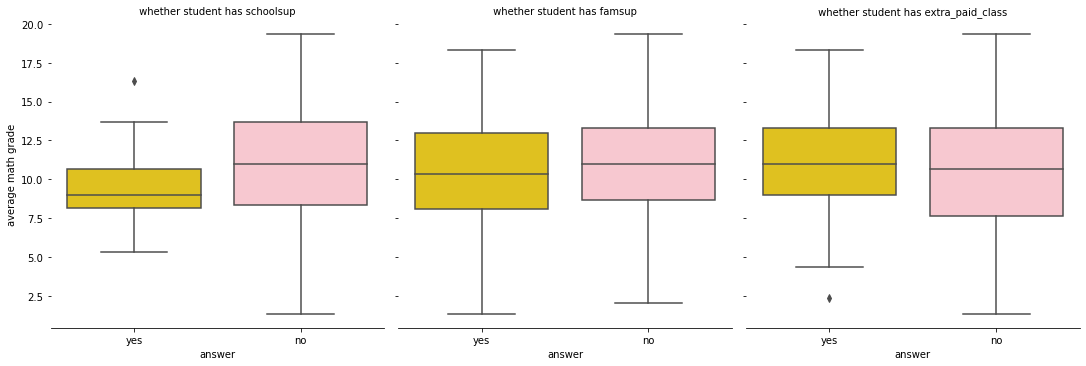

In [16]:
# Using box plot to observe the relationship between 
# students' extra-support received and their and grades in math class

academic_math = sns.catplot(data = math_academic_tidy,
                           x = 'value',
                           y = 'ave_grade',
                           kind = 'box',
                           col = 'attribute',
                           palette = sns.color_palette(['gold', 'pink']))


academic_math.set_titles(col_template = ' whether student has {col_name} ')
academic_math.set_axis_labels('answer','average math grade')
academic_math.despine(left = True)

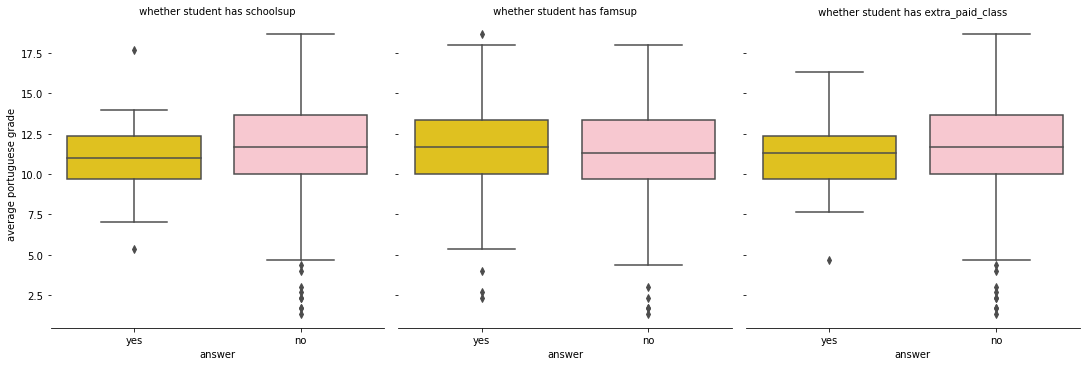

In [17]:
# Using box plot to observe the relationship between 
# students' extra-support received and their and grades in portuguese class

academic_por = sns.catplot(data = por_academic_tidy,
                           x = 'value',
                           y = 'ave_grade',
                           kind = 'box',
                           col = 'attribute',
                           palette = sns.color_palette(['gold', 'pink']))


academic_por.set_titles(col_template = ' whether student has {col_name} ')
academic_por.set_axis_labels('answer','average portuguese grade')
academic_por.despine(left = True)

### Analasis:
- Overall, for both math and portuguese class, the extra support students received doesn't mean higher grades.

### Math

- In fact, for math class, the highest grade is received by students without extra family support, school support, or paid classes.
- However, the minimum grade of students without extra support is overall lower than students with school or paid classes support. This may serve as an identification for school support and paid classes as relative guarantees that could prevent most of the students from falling behind too much.
- The median of the math grades of students without school support and students without extra paid classes are greater than their counterparts who received those support; students with family support seem to have a slightly higher math grade median, but this difference is very unobvious. 

### Portuguese
- For portuguese class, the highest grade is received by students without extra family school support or paid classes.
- Similar to math class, the minimum grade of students without extra support is overall lower than students with school, family  or paid classes support. This may serve as an identification for family support, school support and paid classes as relative guarantees that could prevent most of the students from falling behind too much.
- Also similar to math class, the median of the portuguese grades of students without school support and students without extra paid classes are slightly greater than their counterparts who received those support; students with family support seem to have a slightly higher grade median, but this difference is very unobvious. 

### Overall
- The relationship between the extra supports students received and their grades show very similar pattern in math class dataset and portuguese class dataset, which means that these patterns have the potential be generalized across different subjects.
- From the minimum grade point of view, extra academic support from home, school, and paid classes is possible of giving students a guarantee that prevent them from totally left behind and getting a lowest grade. 
- However, the median grades of students received extra supports are not higher, or are even tend to be lower than students without those supports, which indicate that extra supports from family, school, or paid classes are not necessary for students to keep up with most peers' levels and achieve an average grade.
- The highest grades are mostly received by students without any extra supports, which mean that those extra support are not necessary for top students to get the best grade. There must be some other factors that help them to achieve the top level.

## II (b) Study Time and Grade
Given that the extra supports students received do not mean a higher grade, we hypothesize that there are other factors that decide or influence students' grades. 
One factor that is easily thought of is how hard-working the student is. In other words, we propose that if a student puts more time and effort into a subject, they are likely to receive a higher grade. 
Thus, we use bar plot to explore the relationship between students study hours per week and their grades

Text(0.5, 1.0, 'Relationship between Study Time and Average Math Grade')

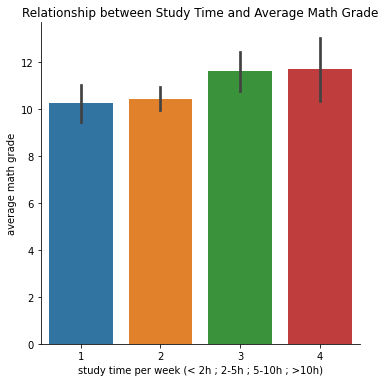

In [18]:
# Using bar plot to observe the relationship between 
# students' study time and their and grades in math class

math_hours = sns.catplot(data = math,
                        x = 'studytime',
                        y = 'ave_grade',
                        kind = 'bar')

math_hours.set_axis_labels('study time per week (< 2h ; 2-5h ; 5-10h ; >10h)',
                             'average math grade')

plt.title('Relationship between Study Time and Average Math Grade')

Text(0.5, 1.0, 'Relationship between Study Time and Average Portuguese Grade')

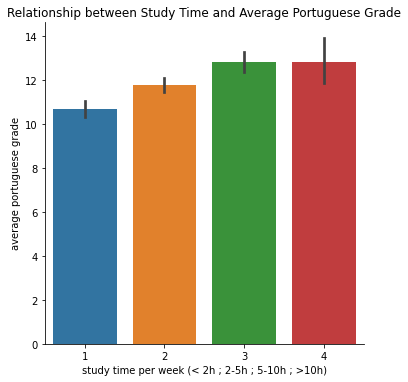

In [19]:
# Using bar plot to observe the relationship between 
# students' study time and their and grades in Portuguese class

por_hours = sns.catplot(data = por,
                        x = 'studytime',
                        y = 'ave_grade',
                        kind = 'bar')

por_hours.set_axis_labels('study time per week (< 2h ; 2-5h ; 5-10h ; >10h)',
                             'average portuguese grade')

plt.title('Relationship between Study Time and Average Portuguese Grade')

In [20]:
# To better support our analysis, we also position the 
# highest math and portuguese grades and check the study
# time of students who got the highest grade.

print(math[math['ave_grade'] == math['ave_grade'].max()]['studytime'])
print(por[por['ave_grade'] == por['ave_grade'].max()]['studytime'])

# The students received the highest math and portuguese grades
# both study more than 10 hours per week

47    4
Name: studytime, dtype: int64
338    4
Name: studytime, dtype: int64


### Analysis
- Overall, longer study time per week is related to higher academic performance (grades).

### Math
- Students who study more than 5 hours per week received significantly higher average grades than students who study less than 5 hours per week.
- The grade difference between students who study 5-10 hours per week and students who study more than 10 hours per week is not significant.
- The grade difference between students who study 2-5 hours per week and students who study less than 2 hours per week is not significant.

### Portuguese
- Students who study more than 5 hours per week received significantly higher average grades than students who study less than 5 hours per week.
- The grade difference between students who study 5-10 hours per week and students who study more than 10 hours per week is not significant.
- Students who study less than 2 hours received even lower average grades than those who study 2-5 hours per week.

### Overall
- 5 hour generally serves as a dividing line. For both classes, students who study more than 5 hours per week got significantly higher grades.
- Both classes' highest grades are received by students who study more than 10 hours per week, indicating that the time and effort students put on learning are closely related to getting the top level grades
- Students who study less than 2 hours per week do not receive significantly lower math grades than those who study 2-5 hours per week, but this is not true for portuguese class. One possible explanation is that portuguese class, as a language class, depends on practice and memorization more than math. Thus, students who spend more time studying can better master the portuguese materials. A small time difference could lead to different language learning outcome. However, the effect of time spent on math grades is not that obvious since math sometimes depends on understanding and comprehension more than the raw time spent.


# III. Analyses

## III (a). Linear Regression: Study Time and Grade
Based on the graph describing the relationship between study time and students' grades, we got the perspective that generally more studying time per week is positively related to higher grades. Thus, we decided to use a linear regression method to figure out a more detailed and sophiticated numerical relationship between these two factors.

Although the studytime scale is not strictly continuous, it is numerical and has a comparable order, so we think we could use linear regression to figure out some pattern of their relationship.

In [21]:
# We first fit a linear regression to explore the relationship between students' study time and their 
# math grades. We split our datasets into a training set and a testing set with a test size of 20%

x_vals = np.array(math['studytime']).reshape(len(math),1)
y_vals = math['ave_grade']

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = 1)
mod = LinearRegression()
mod.fit(X = xtrain, y = ytrain)
coef = mod.coef_
intercept = mod.intercept_
score = mod.score(X = xtrain, y = ytrain)

# The result revealed that there is a significantly positive relationship between students study time and their
# math grades. However, the coefficient of determinition is very low.


# Then we calculated the MSE value of the training and testing data.

train_pred = mod.predict(xtrain)
train_mse = mean_squared_error(y_true = ytrain, y_pred = train_pred)
test_pred = mod.predict(X = xtest)
test_mse = mean_squared_error(y_true = ytest, y_pred = test_pred)

output = '''The slope of the relationship between study time and grades generated by training data is {}. 
        The training MSE and testing MSE are {} and {} accordingly'''.format(coef[0], train_mse, test_mse)
output


# After using our model to fit the training and testing data and trying to predict students' grades,
# we found that the mean squared error when predicting training data and testing data are not too
# far away from each other, which indicating the relative reliability of the model generated.

'The slope of the relationship between study time and grades generated by training data is 0.7815402038505096. \n        The training MSE and testing MSE are 14.261057651721135 and 10.005381406577055 accordingly'

In [22]:
# We then fit a linear regression to explore the relationship between students' study time and their 
# portuguese grades. We split our datasets into a training set and a testing set with a test size of 20%

x_vals = np.array(por['studytime']).reshape(len(por),1)
y_vals = por['ave_grade']

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = 1)
mod = LinearRegression()
mod.fit(X = xtrain, y = ytrain)
coef = mod.coef_
intercept = mod.intercept_
score = mod.score(X = xtrain, y = ytrain)

# The result revealed that there is a significantly positive relationship between students study time and their
# math grades. However, the coefficient of determinition is very low.


# Then we calculated the MSE value of the training and testing data.

train_pred = mod.predict(xtrain)
train_mse = mean_squared_error(y_true = ytrain, y_pred = train_pred)
test_pred = mod.predict(X = xtest)
test_mse = mean_squared_error(y_true = ytest, y_pred = test_pred)

output = '''The slope of the relationship between study time and grades generated by training data is {}. 
        The training MSE and testing MSE are {} and {} accordingly'''.format(coef[0], train_mse, test_mse)
output


# After using our model to fit the training and testing data and trying to predict students' grades,
# we found that the mean squared error when predicting training data and testing data are not too
# far away from each other, which indicating the relative reliability of the model generated.

'The slope of the relationship between study time and grades generated by training data is 0.7886283881246099. \n        The training MSE and testing MSE are 7.047716272761529 and 9.17834705305889 accordingly'

### Analysis

- Using linear regression to explore the relationship between students' study time and grades, although the coefficient of determination is not ideal, we got relatively ideal MSE for both training and testing data.
- The slope parameter we got was significantly higher than 0, indicating that there exists an obvious positive relationship between students' study time and their grades.
- Thus, the linear regression analysis further support the pattern we found through graphs that students who spend more time studying are more likely to get better grades.

# III (b). Knn Classification: Father and Mother's Education

Marriage is one important feature of social class and mobility. Basically, people tend to marry with those who are roughly at the similar social class, and this may lead to less social mobility. Using this dataset, we try to predict mother's education level by father's education level to examine if most couples have similar level of education with each other.

In [23]:
# We initialize a Knn to predict mother's education level based on father's
# education level with 20% data as test set.

# To check the overall accuracy of this Knn prediction, we loop through
# random state from 0 to 99 and calculated the average accuracy score of 100 predictions

# We choose n_neighbors equals to 20 since the math dataset has 395 samples, 
# and 20 is the square root of 400.
x_vals = np.array(math['Fedu']).reshape(len(math),1)
y_vals = math['Medu']

score = []
for rs in np.arange(0, 100):
    xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = rs)
    knn = KNeighborsClassifier(n_neighbors = 20)
    knn.fit(X = xtrain, y = ytrain)
    preds = knn.predict(X = xtest)
    score.append(knn.score(X = xtest, y = ytest))

summation = 0
for num in score:
    summation += num
    average_accuracy = summation / 100
average_accuracy

# The average accuracy score of these 100 loops of Knn predictions is 48%,
# which is not very high but still close to 50%.

0.48278481012658225

In [24]:
# We implemented the same process for the Portuguese datasets

x_vals = np.array(por['Fedu']).reshape(len(por),1)
y_vals = por['Medu']

score = []
for rs in np.arange(0, 100):
    xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = rs)
    knn = KNeighborsClassifier(n_neighbors = 25)
    knn.fit(X = xtrain, y = ytrain)
    preds = knn.predict(X = xtest)
    score.append(knn.score(X = xtest, y = ytest))

summation = 0
for num in score:
    summation += num
    average_accuracy = summation / 100
average_accuracy

# The average accuracy score of 100 loops of prediction is 52%, more than one half.

0.5200000000000002

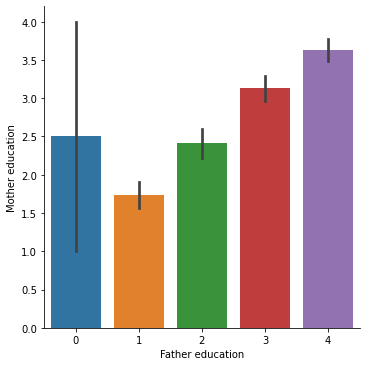

In [49]:
# To further demonstrate the relationship between father and mother's education level,
# we also plot a bar plot describing this relathinship.

parents = sns.catplot(data = math,
                x = 'Fedu',
                y = 'Medu',
                kind = 'bar')

parents.set_axis_labels('Father education','Mother education')


# Our bar plot shows that except for those fathers who do not have any education
# experience, the overall trend is that mother's education level increases as
# father's education level increases.

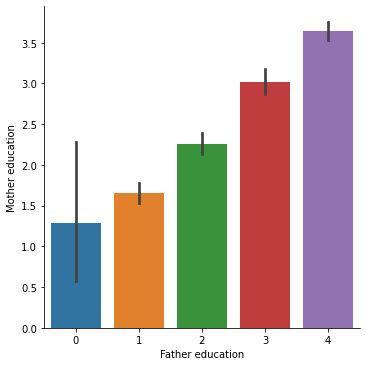

In [50]:
parents = sns.catplot(data = por,
                      x = 'Fedu',
                      y = 'Medu',
                      kind = 'bar')

parents.set_axis_labels('Father education','Mother education')

# The portuguese dataset showes this relathinship more clearly:
# mother's education level increases as father's education level increases,
# ranging from no educaion to higher education.

### Analysis

- For both math and portuguese datasets, using Knn classification to predict mother's education level based on father's education level could get an accuracy score of approximately 50%.
- Thus, a significant amount of people get married with those who have roughly the same education level with themselves.
- This phonomenon may be related to the relatively low social mobility, and may continue to influence the education situation and social mobility of the next generation.

# III (c). Logistic Regression: Father's education and Students' Grades
Since the topic about educational inequality frequently discussed that parents' educational level is related to students' academic performance, we use logistic regression to predict students' grades based on their fathers' education level. We only use father since our Knn classification above illustrated that the education levels of a couple tends to be similar

In [25]:
# To simplify the analysis, we divide students' grades into 2 range,
# range "a" means their average grades are higher than or equal to 10, 
# range "b" means their average grades are less than 10.
# We tried to predict the students' math grades range based on their father's education.

# To get an overall accuracy score of our algorithms, we implemented
# similar process as above, which loops through the random state from 0 to 99
# and calculated the average accuracy score of 100 loops

# We also calculated the average coefficient returned by 100 predictions
# to check the direction of the relationship betwee two variables.

math['grade_level'] = np.where(math['ave_grade'] >= 10, 1, 2)

x_vals = np.array(math['Fedu']).reshape(len(math), 1)
y_vals = math['grade_level']

accuracy_score = []
coef = []
for rs in np.arange(0,100):
    xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = rs)
    log_reg = LogisticRegression(random_state = rs)
    log_reg.fit(X = xtrain, y = ytrain)
    accuracy_score.append(log_reg.score(X = xtest, y = ytest))
    coef.append(np.exp(log_reg.coef_[0][0]))

summation = 0
for num in accuracy_score:
    summation += num
    average_accuracy = summation / 100
average_accuracy

summation_coef = 0
for num in coef:
    summation += num
    average_coef = summation / 100
    
'math: average_accuracy {}   average_coefficient {}'.format(average_accuracy, average_coef)



# The average accuracy score we got is more than 60%, a pretty robust relationship
# between father's education level and students' math grades.

# The average coefficient is 1.34, indicating a positive relationship between father's
# education level and students' math grades: every unit increase in father's education
# level indicates 34% increase in the probability that students' average math grades are 
# higher than 10

'math: average_accuracy 0.6111392405063295   average_coefficient 1.3421279955594416'

In [26]:
# Then we implemented the similar process on the Portuguese datasets

por['grade_level'] = np.where(por['ave_grade'] >= 10, 1, 2)

x_vals = np.array(por['Fedu']).reshape(len(por), 1)
y_vals = por['grade_level']

accuracy_score = []
coef = []
for rs in np.arange(0,100):
    xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = rs)
    log_reg = LogisticRegression(random_state = rs)
    log_reg.fit(X = xtrain, y = ytrain)
    accuracy_score.append(log_reg.score(X = xtest, y = ytest))
    coef.append(np.exp(log_reg.coef_[0][0]))

summation = 0
for num in accuracy_score:
    summation += num
    average_accuracy = summation / 100
average_accuracy

summation_coef = 0
for num in coef:
    summation += num
    average_coef = summation / 100
    
'portuguese: average_accuracy {}   average_coefficient {}'.format(average_accuracy, average_coef)

# The average accuracy score we got is more than 75%, a pretty robust relationship
# between father's education level and students' portuguese grades.

# The average coefficient is 1.38, indicating a positive relationship between father's
# education level and students' portuguese grades: every unit increase in father's education
# level indicates 38% increase in the probability that students' average 
# portuguese grades are higher than 10

'portuguese: average_accuracy 0.760076923076923   average_coefficient 1.3838504347973548'

### Analysis

- For both datasets, our logistic regression revealed that the increase in father's education level is positively related to students grades, and this relationship is pretty robust and significant.
- This result supports the argument that parents' education level is related to their children's academic performance, which is an important topic in consideration of education equity and social equality.

# III. (d) Multiple Regression: Parents' educaion Level and Students' Grades
Since there are some deviations between a couple's education level, to more specifically explore the relationship between parents' education levels and students' grades, we added an extra multiple regression to predict students' grades using both father and mother's education level.

In [55]:
# Starting with the math dataset, we implemented a multiple regression using
# father and mother's education levels as predictors.

x_vals = np.array(math[['Fedu','Medu']]).reshape(len(math),2)
y_vals = math['ave_grade']

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = 1)
mod = LinearRegression()
mod.fit(X = xtrain, y = ytrain)
coef = mod.coef_
intercept = mod.intercept_
score = mod.score(X = xtrain, y = ytrain)


train_pred = mod.predict(xtrain)
train_mse = mean_squared_error(y_true = ytrain, y_pred = train_pred)
test_pred = mod.predict(X = xtest)
test_mse = mean_squared_error(y_true = ytest, y_pred = test_pred)

output = '''The slope of the relationship between study time and grades generated by training data is {} and {}. 
        The training MSE and testing MSE are {} and {} accordingly'''.format(coef[0],coef[1], train_mse, test_mse)
output

# Both of the coefficients returned by the regression are positive, indicating that
# parents' education level has a positive relationship with students' grades.

'The slope of the relationship between study time and grades generated by training data is 0.20163182156338874 and 0.6851125526399254. \n        The training MSE and testing MSE are 13.87966515320945 and 9.084215565687005 accordingly'

In [56]:
# Then we implemented the same multiple regression process
# on the portuguese dataset.

x_vals = np.array(por[['Fedu','Medu']]).reshape(len(por),2)
y_vals = por['ave_grade']

xtrain, xtest, ytrain, ytest = train_test_split(x_vals, y_vals, test_size = 0.2, random_state = 1)
mod = LinearRegression()
mod.fit(X = xtrain, y = ytrain)
coef = mod.coef_
intercept = mod.intercept_
score = mod.score(X = xtrain, y = ytrain)


train_pred = mod.predict(xtrain)
train_mse = mean_squared_error(y_true = ytrain, y_pred = train_pred)
test_pred = mod.predict(X = xtest)
test_mse = mean_squared_error(y_true = ytest, y_pred = test_pred)

output = '''The slope of the relationship between study time and grades generated by training data is {} and {}. 
        The training MSE and testing MSE are {} and {} accordingly'''.format(coef[0],coef[1], train_mse, test_mse)
output

# Both of the coefficients returned by the regression are positive, indicating that
# parents' education level has a positive relationship with students' grades.

'The slope of the relationship between study time and grades generated by training data is 0.25807350819620833 and 0.4481902813417907. \n        The training MSE and testing MSE are 6.967452803544892 and 9.175906899691888 accordingly'

# IV. Overall Conclusion

- Our analysis revealed that there are factors that lead to social stratification and reduce social mobility. For instance, most people marry with those who share the similar education level with themselves, and father's education level has a positive relationship with students' academic performance. These findings may need to be considered for sociological questions related to social class and mobility, including how to help first generation students.

- Despite the fact that students' backgrounds may influence their academic performance, the most important factors for students' grades are still their own work. Through our analysis, students who spent more time studying tend to receive higher grades. Moreover, although extra supports like family support, school support, and extra paid class may help students to a certain degree, a lot of students who received top grades did not have these supports.

- Thus, social and personal factors are both influential for students' academic performance. I argue that to improve the education quality and students' performance, we should explore those social factors and implement interventions accordingly, but at the same time, we should encourage students to work hard by themselves.

## Shortcomings:

- The accuracy scores returned by linear regression and multiple regression are low.
- The analysis did not include dimensionality reduction.